In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
df.shape

(891, 15)

In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df['age'] = df['age'].fillna(df['age'].mean())

In [12]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [13]:
df.dropna(subset = 'embarked' ,inplace=True)


In [14]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [15]:
df.dropna(subset='embark_town' ,inplace=True)

In [16]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [17]:
df = df.dropna()

In [18]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

# EDA

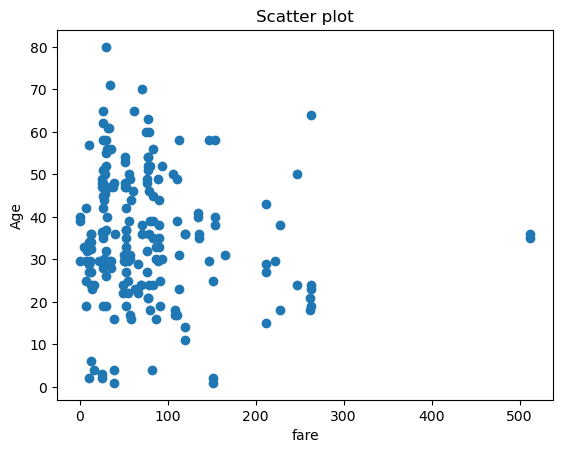

In [26]:
plt.title("Scatter plot")
plt.xlabel("fare")
plt.ylabel("Age")
plt.scatter(x='fare' ,y= 'age',data = df)  #main line
plt.show()

<Axes: xlabel='Fare', ylabel='Density'>

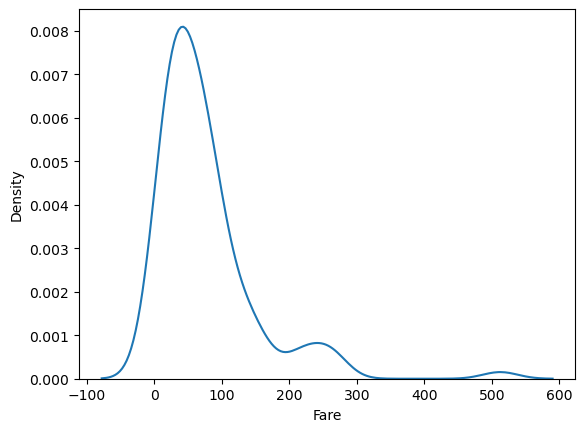

In [158]:
sns.kdeplot(df['Fare'])

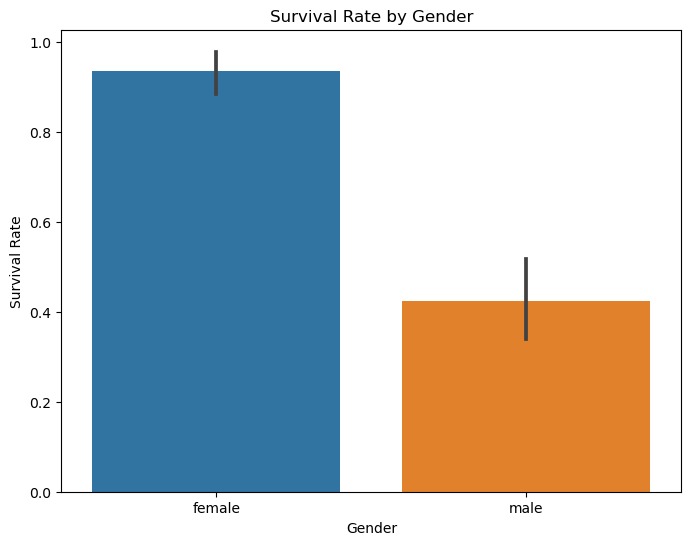

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='survived', data=df) #main line
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

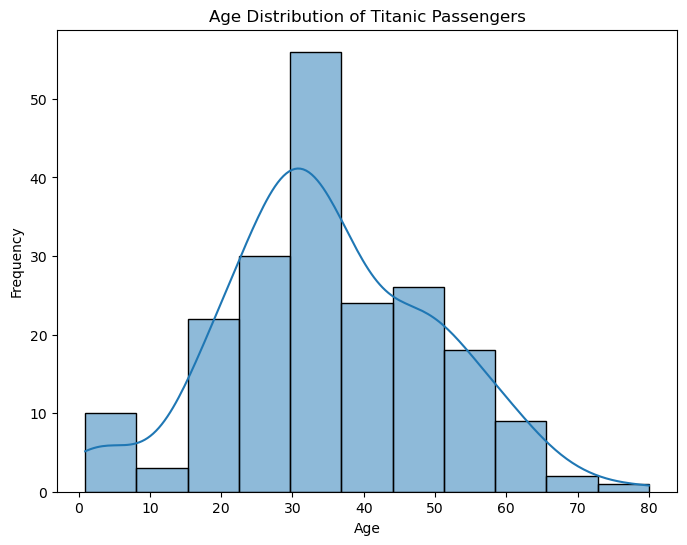

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True )  #main line
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

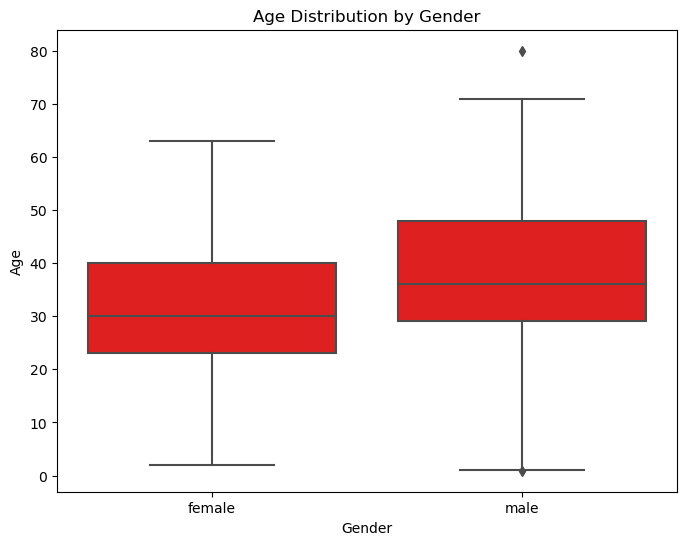

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='age', data=df ,color='red')  #main line  
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

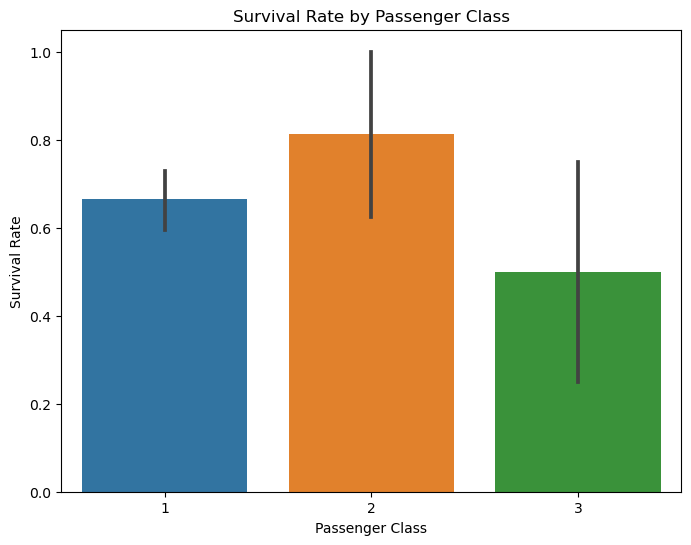

In [25]:
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=df)  #main line
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

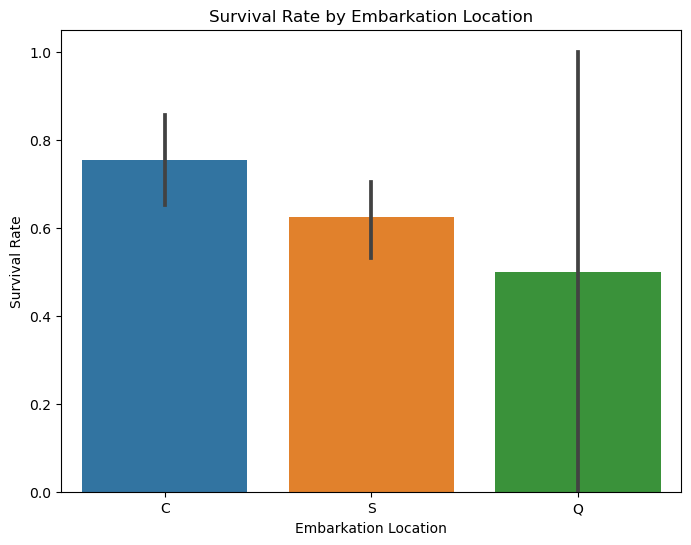

In [33]:
plt.figure(figsize=(8, 6))
sns.barplot(x='embarked', y='survived', data=df)  #main line
plt.title("Survival Rate by Embarkation Location")
plt.xlabel("Embarkation Location")
plt.ylabel("Survival Rate")
plt.show()

Text(0.5, 1.0, 'Distribution of Passengers by Class')

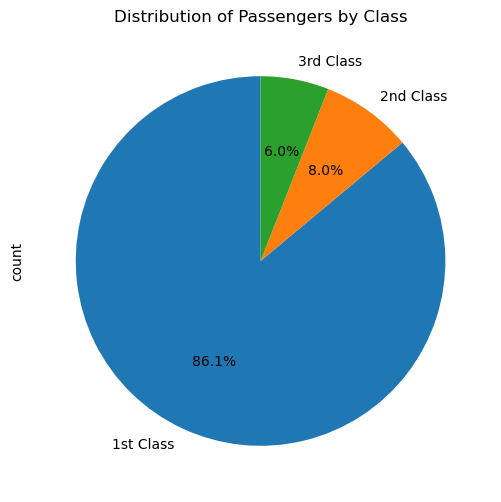

In [58]:
plt.figure(figsize=(6, 6))  
pclass_distribution = df['pclass'].value_counts()    #main line
pclass_distribution.plot.pie(autopct='%1.1f%%', labels=['1st Class', '2nd Class', '3rd Class'], startangle=90) #main line
plt.title("Distribution of Passengers by Class")
plt.show()

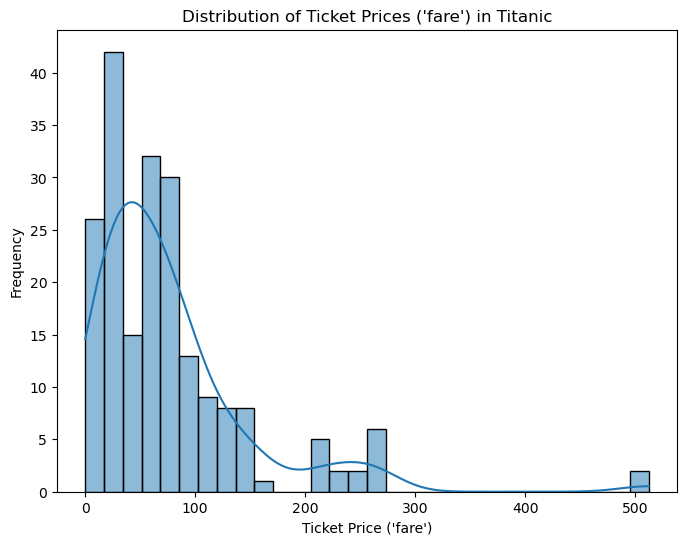

In [40]:

plt.figure(figsize=(8, 6)) 
sns.histplot(df['fare'], kde=True, bins=30)  #main line
plt.title("Distribution of Ticket Prices ('fare') in Titanic")
plt.xlabel("Ticket Price ('fare')")
plt.ylabel("Frequency")
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\solan\anaconda1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


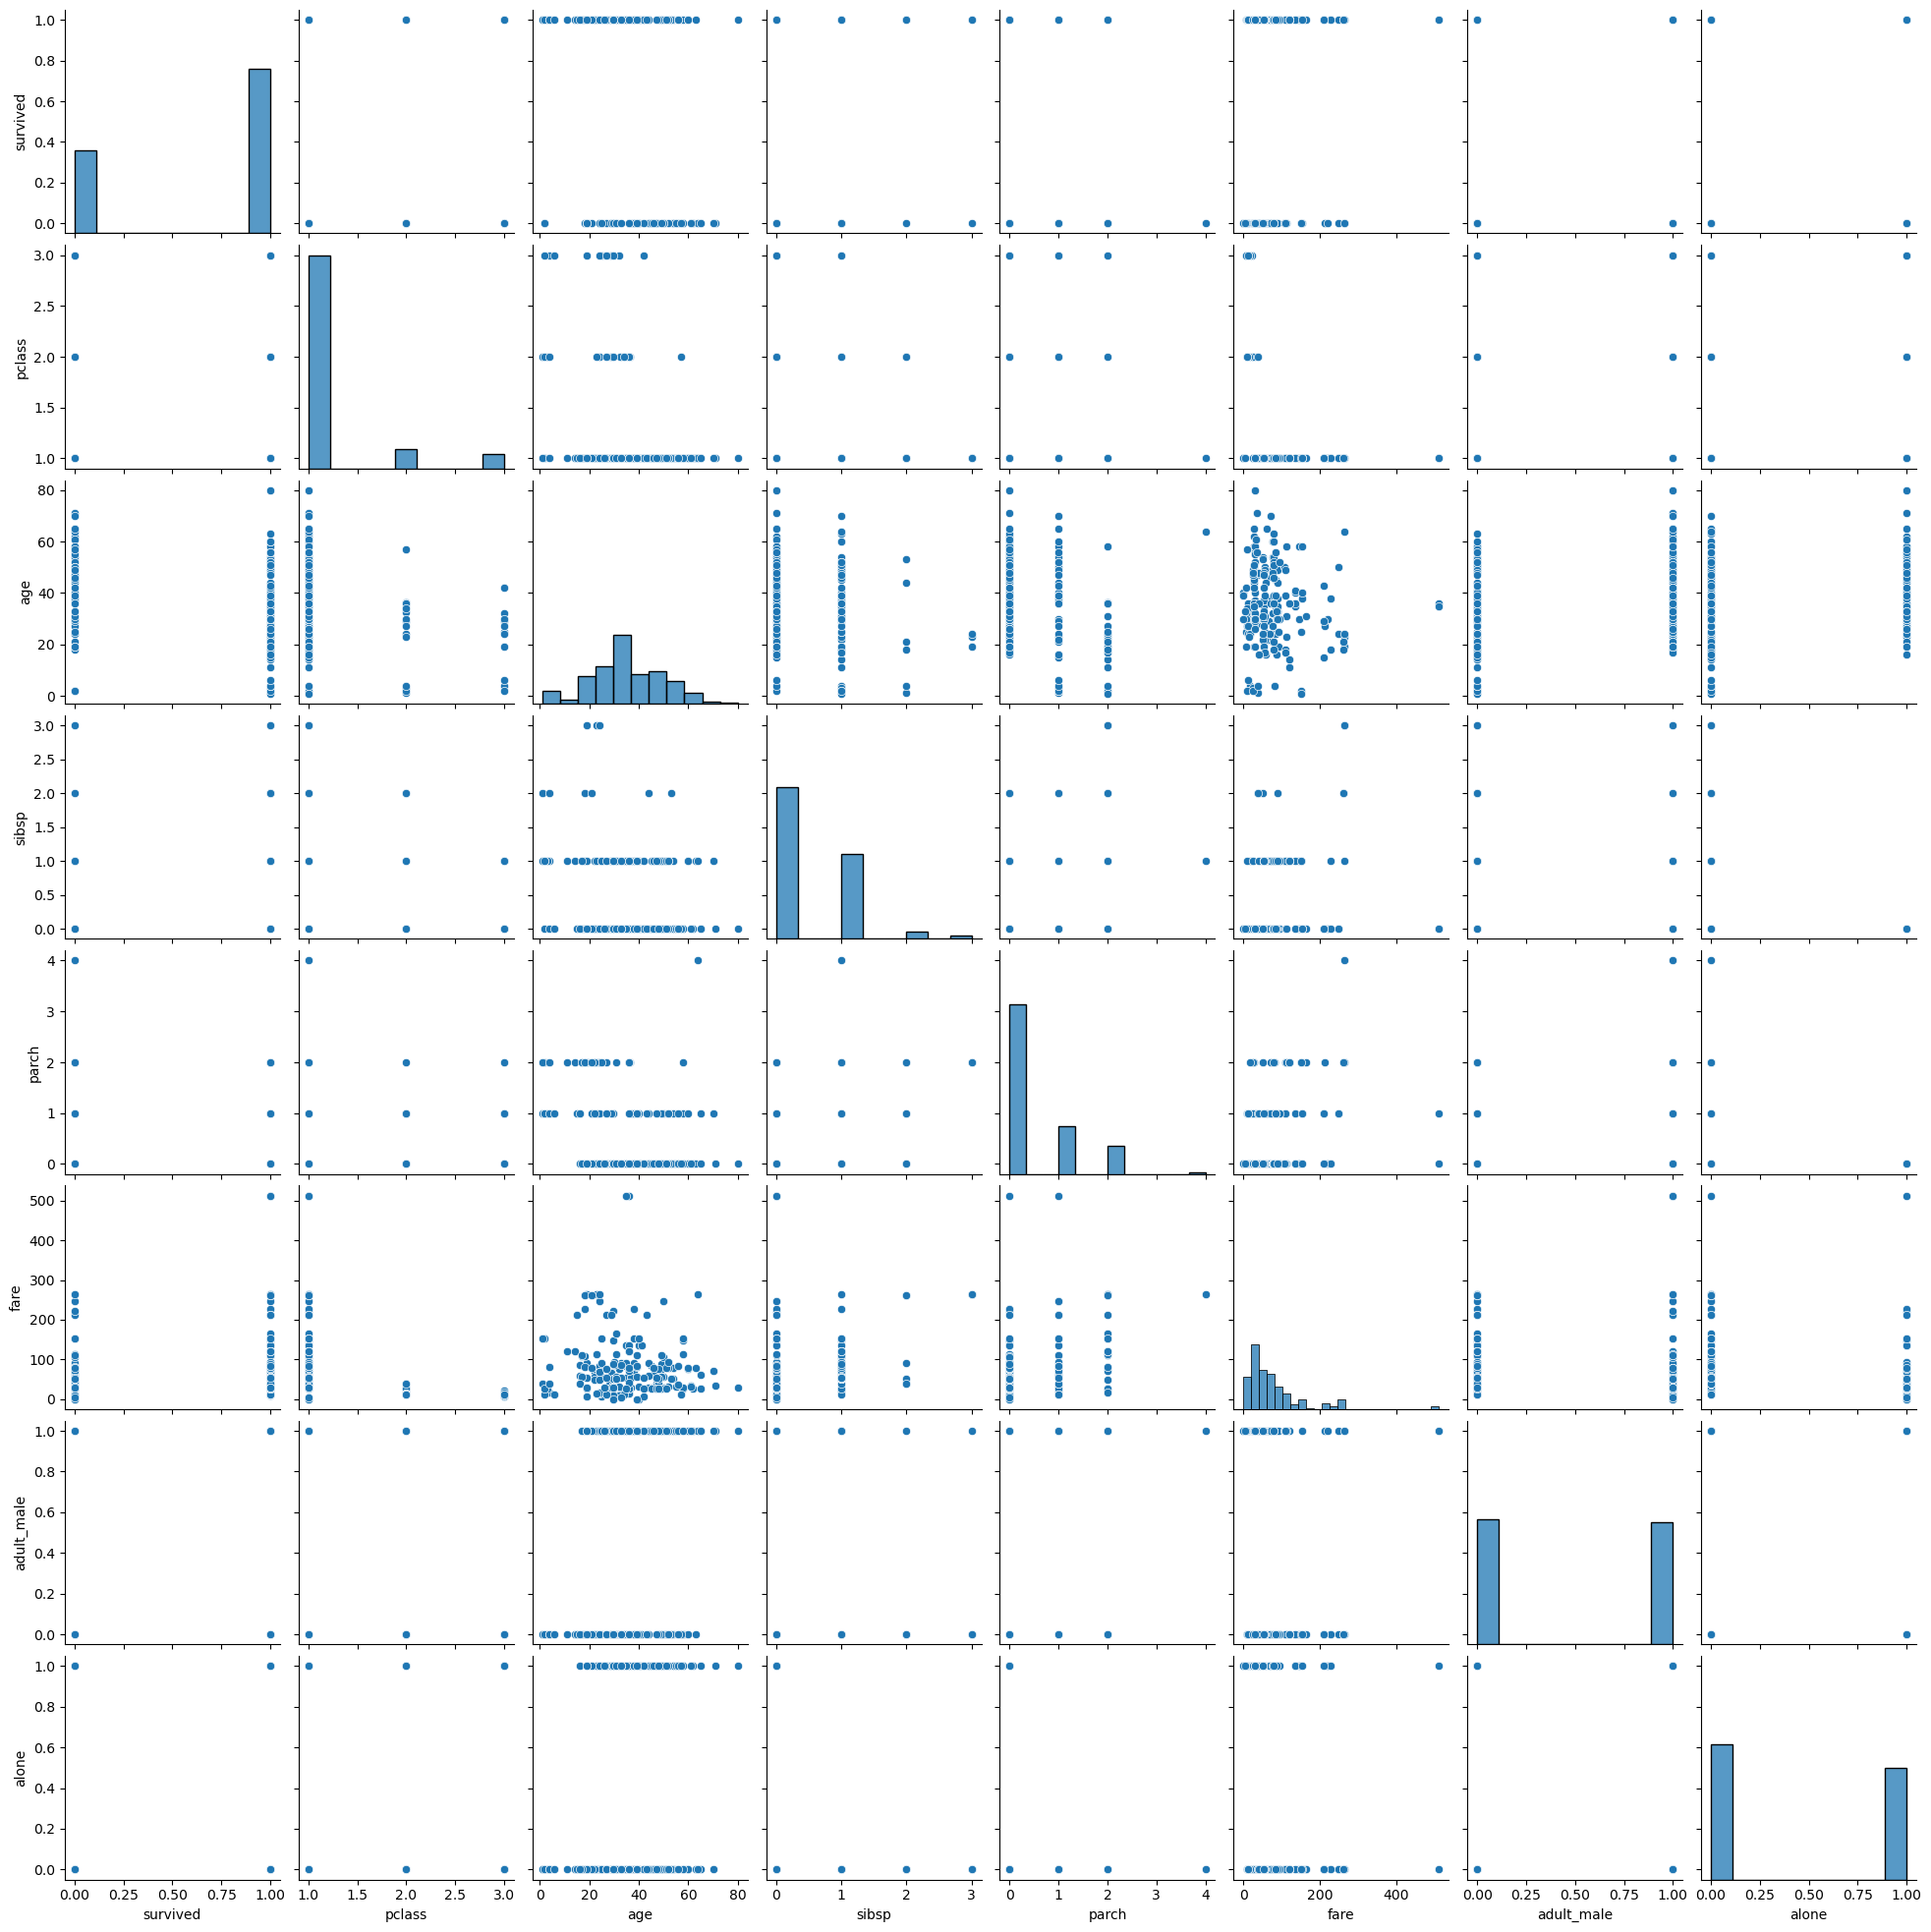

In [44]:
sns.pairplot(df)

C:\Users\solan\anaconda1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


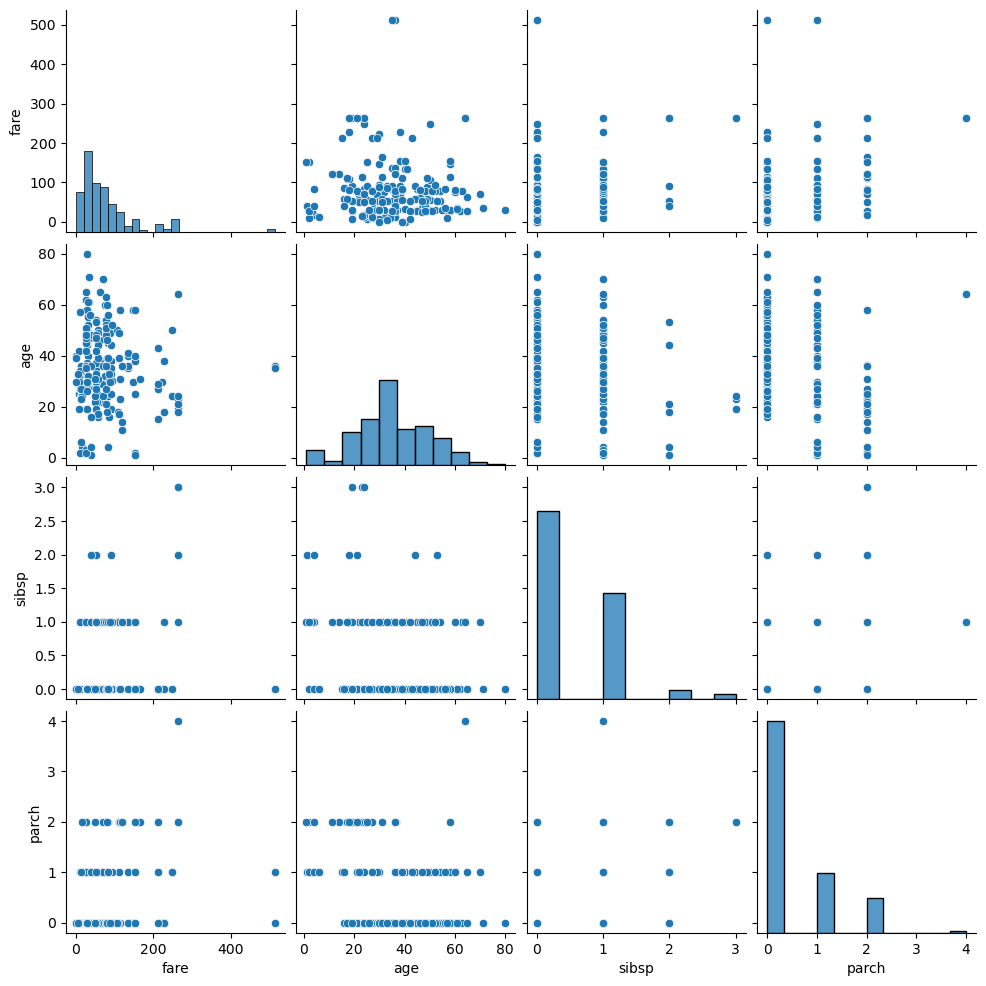

In [52]:
numerical_cols = ['fare', 'age', 'sibsp', 'parch']   #main line
sns.pairplot(df[numerical_cols])   #main line
plt.show()

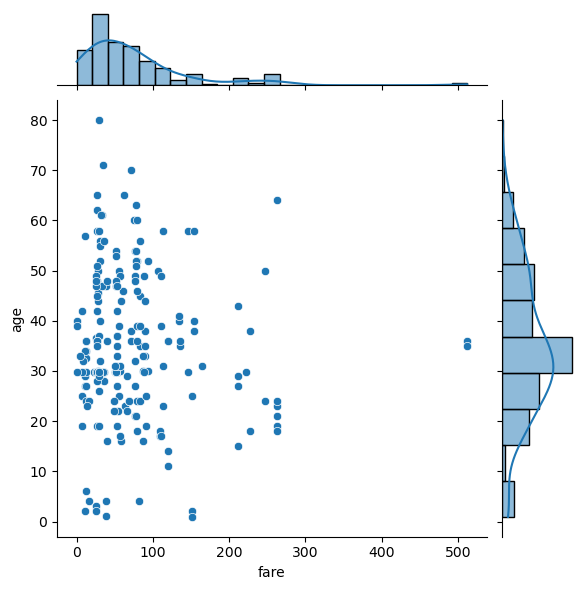

In [48]:
sns.jointplot(x='fare', y='age', data=df, kind='scatter', marginal_kws={'kde': True}) #optional
plt.show()

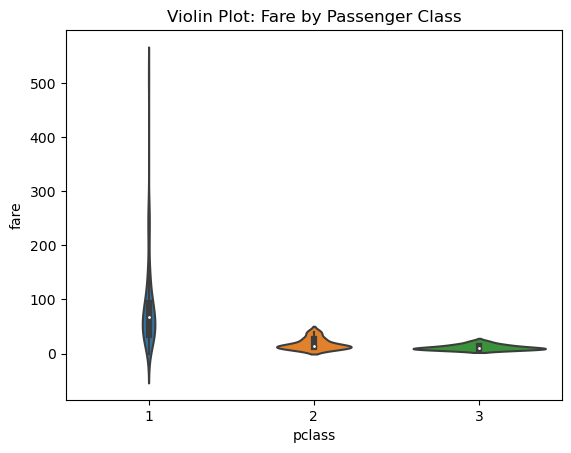

In [57]:
sns.violinplot(x='pclass', y='fare', data=df)   #optional
plt.title("Violin Plot: Fare by Passenger Class")
plt.show()